<a href="https://colab.research.google.com/github/Karlajack/MachineLearning1/blob/main/Wk4_Model_selection_and_optimization_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model selection and optimization

Importing necessary Libraries and Data

In [17]:
## import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import missingno as msno
##import from sklearn library
from sklearn import datasets
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import LinearSVR,SVR,NuSVR
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings(action="ignore")

In [25]:
# importing the data

data=pd.read_csv('/content/creditcard.csv')


data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0


# EDA and Data Cleaning

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237697 entries, 0 to 237696
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    237697 non-null  float64
 1   V1      237697 non-null  float64
 2   V2      237697 non-null  float64
 3   V3      237697 non-null  float64
 4   V4      237697 non-null  float64
 5   V5      237697 non-null  float64
 6   V6      237697 non-null  float64
 7   V7      237696 non-null  float64
 8   V8      237696 non-null  float64
 9   V9      237696 non-null  float64
 10  V10     237696 non-null  float64
 11  V11     237696 non-null  float64
 12  V12     237696 non-null  float64
 13  V13     237696 non-null  float64
 14  V14     237696 non-null  float64
 15  V15     237696 non-null  float64
 16  V16     237696 non-null  float64
 17  V17     237696 non-null  float64
 18  V18     237696 non-null  float64
 19  V19     237696 non-null  float64
 20  V20     237696 non-null  float64
 21  V21     23

In [27]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,237697.000000,237697.000000,237697.000000,237697.000000,237697.000000,237697.000000,237697.000000,237696.000000,237696.000000,237696.000000,...,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000
mean,81871.822821,-0.056071,-0.018314,0.142938,0.036314,-0.051214,0.024601,-0.020659,0.002256,0.001530,...,-0.004237,-0.017420,-0.008465,0.000459,0.030182,0.002341,-0.000286,0.001421,91.166845,0.001817
std,41002.214520,1.958947,1.673240,1.501620,1.414487,1.378383,1.325293,1.231280,1.205227,1.118834,...,0.743184,0.712807,0.643693,0.606529,0.512419,0.486523,0.402552,0.333792,252.237773,0.042593
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,48833.000000,-0.944731,-0.606249,-0.641402,-0.830881,-0.738647,-0.739742,-0.566363,-0.198608,-0.659212,...,-0.225502,-0.533684,-0.166238,-0.349938,-0.281698,-0.330711,-0.070262,-0.049305,6.000000,0.000000
50%,75233.000000,-0.021736,0.063992,0.331599,0.029093,-0.108948,-0.244119,0.015041,0.031032,-0.063551,...,-0.033047,-0.007017,-0.020704,0.046300,0.064976,-0.059379,0.002891,0.015005,23.490000,0.000000
75%,123559.000000,1.252520,0.780887,1.129056,0.819306,0.549477,0.427922,0.540745,0.331364,0.609558,...,0.172554,0.483697,0.130949,0.429272,0.369590,0.250693,0.089156,0.078029,79.990000,0.000000
max,149353.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [13]:
 data.shape

(200126, 31)

In [28]:
 #Missingness

 #Missingness
Missing_Total=data.isnull().sum().sort_values(ascending=False)

Missing_Total

V15       1
V16       1
Amount    1
V28       1
V27       1
V26       1
V25       1
V24       1
V23       1
V22       1
V21       1
V20       1
V19       1
V18       1
V17       1
Class     1
V14       1
V13       1
V12       1
V11       1
V10       1
V9        1
V8        1
V7        1
V1        0
V6        0
V5        0
V4        0
V3        0
V2        0
Time      0
dtype: int64

Text(0.5, 1.0, 'missingness values')

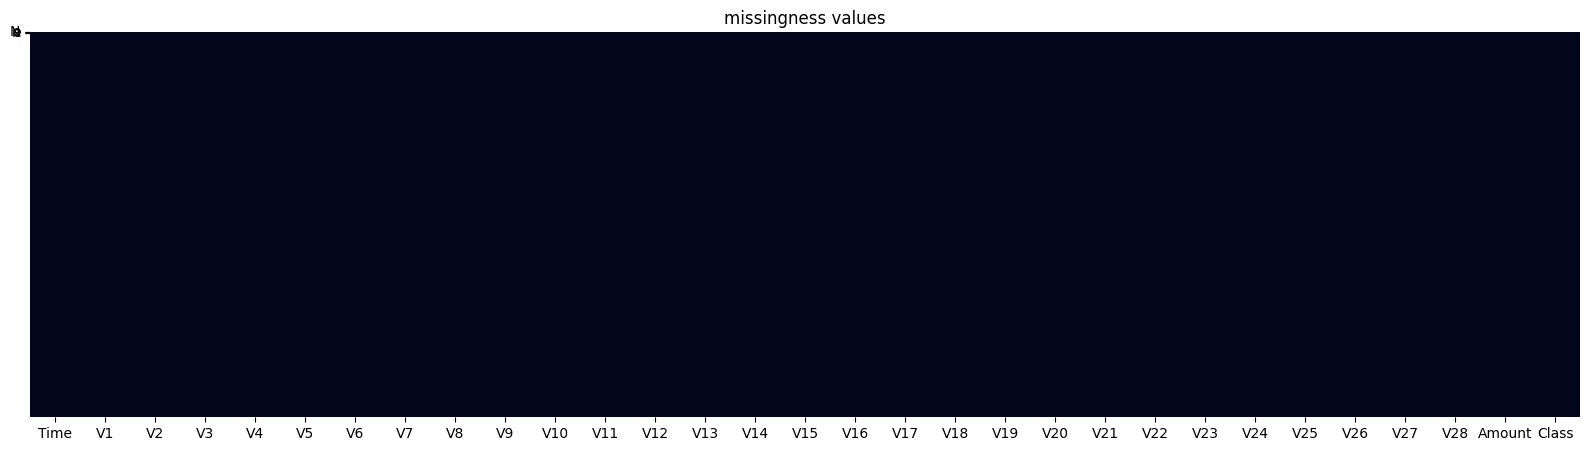

In [9]:
plt.figure(figsize=(20,5))
sns.heatmap(data.isnull(),yticklabels="None",cbar=False)
plt.title("missingness values")

In [10]:
data.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,3610,0.816969,-0.280175,1.354064,2.859548,-0.792255,0.723782,-0.662957,0.298866,1.372479,...,-0.133302,-0.433181,-0.111095,-0.108651,0.181549,-0.089374,-0.026460,0.038635,150.91,0.0
3968,3617,1.134592,0.252051,0.488592,0.799826,-0.264819,-0.369918,-0.243365,0.049761,1.210818,...,-0.351115,-0.851463,0.186169,0.092463,0.020015,0.057976,-0.046611,0.012562,13.99,0.0
3969,3621,-1.338671,1.080974,1.291196,0.719258,0.101320,0.053896,0.001297,-0.917575,1.638510,...,0.498030,-0.483932,0.037686,0.053566,-0.560078,0.230423,-0.119911,0.321847,27.43,0.0
3970,3622,-0.339728,-2.417449,0.975517,2.537995,-1.720361,0.863005,0.032965,0.026764,2.487139,...,0.391639,0.264432,-0.735031,0.450594,0.310022,-0.231357,-0.049872,0.153526,730.32,0.0


In [11]:
data.shape

(3973, 31)

#